# **Data Diri**


*   NIM = 2241720056
*   Nama = Dhika Wahyu Nugroho
*   Kelas = 3F
*   No Absen = 06




# **Tugas**

Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

Anda diperbolehkan melakukan eksplorasi terhadap,
*   Metode pra pengolahan
*   Pemilihan fitur
*   Arsitektur ANN
*   Fungsi Aktiviasi

# **Import Library**

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# **Metode pra pengolahan & Pemilihan Fitur**

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data: Data gambar dinormalisasi dari rentang [0-255] menjadi [0-1] untuk memudahkan pelatihan model.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape data: Gambar (28x28 piksel) diubah menjadi vektor 1D berukuran 784 agar sesuai dengan input layer ANN.
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# One-hot encoding: Label target (0-9) dikonversi menjadi one-hot encoding untuk klasifikasi multi-kelas.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# **Arsitektur ANN**

In [37]:
model = models.Sequential([
    # Input Layer: 784 neuron (ukuran gambar yang di-flatten).
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    # Input Layer: 784 neuron (ukuran gambar yang di-flatten).
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    # Output Layer: 10 neuron dengan fungsi aktivasi softmax untuk memprediksi 10 kelas.
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    verbose=1)

# Evaluasi model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7562 - loss: 0.7983 - val_accuracy: 0.9570 - val_loss: 0.1547
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9308 - loss: 0.2302 - val_accuracy: 0.9657 - val_loss: 0.1190
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9489 - loss: 0.1692 - val_accuracy: 0.9730 - val_loss: 0.0959
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9593 - loss: 0.1346 - val_accuracy: 0.9785 - val_loss: 0.0807
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9643 - loss: 0.1179 - val_accuracy: 0.9763 - val_loss: 0.0794
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9689 - loss: 0.0988 - val_accuracy: 0.9778 - val_loss: 0.0730
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9702 - loss: 0.0936 - val_accuracy: 0.9795 - val_loss: 0.0704
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9757 - loss: 0.0784 - val_accuracy: 0

# **Hasil Accuracy**

Test accuracy: 0.9803
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


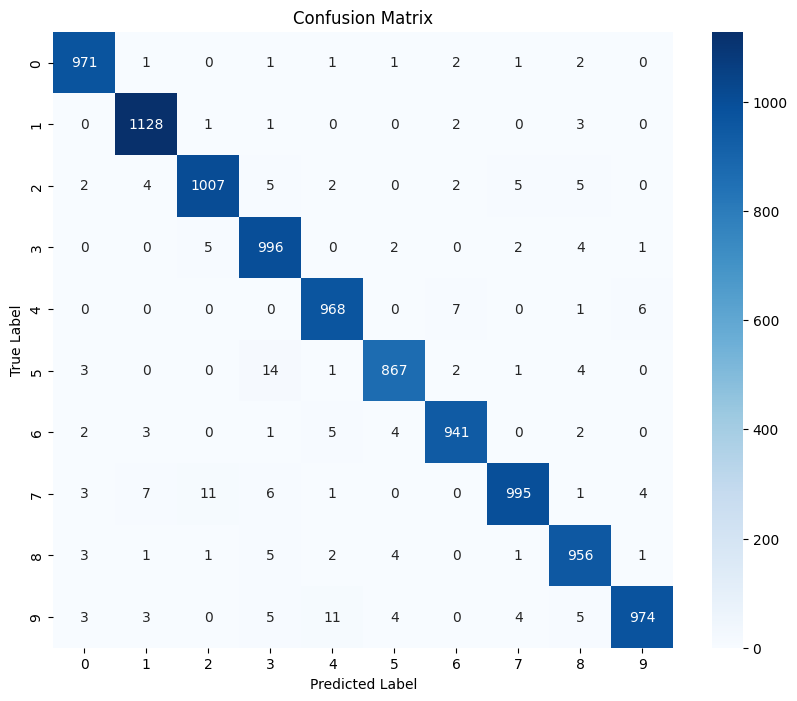

In [34]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
